## 1、各语种电影的数量

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import matplotlib.colors as mcolors
import pymysql

In [212]:
conn = pymysql.connect(
    host='localhost',
    port = 3306,
    user= 'root',  # 这里是连接数据库时数据库的用户名，这里的user和上边的user没有关系
    password='123456',   # 这里是连接数据库时数据库的密码，这里的password和上边的password没有关系
    db = 'sakila_dwh',   # 这个是数据库的其中一个库名，也是我要进行连接的库
    charset = 'utf8'  # 默认编码
)
cursor = conn.cursor()
sql = 'select film_language,count("film_language") from dim_film group by film_language'
lname = []
lcount = []

try:
    row = cursor.execute(sql)
    results = cursor.fetchall()
    for num in results:
        lname.append(num[0])
        lcount.append(num[1])
        print("lname=%s,lcount=%s" %(num[0], num[1]))
    cursor.close()
    conn.close()
except:
    print("Error: unable to fetch data")
if row:
    print("登录成功")
else:
    print("登陆失败")

lname=None,lcount=1
lname=English,lcount=316
lname=Japanese,lcount=246
lname=French,lcount=134
lname=Italian,lcount=99
lname=Mandarin,lcount=91
lname=German,lcount=114
登录成功


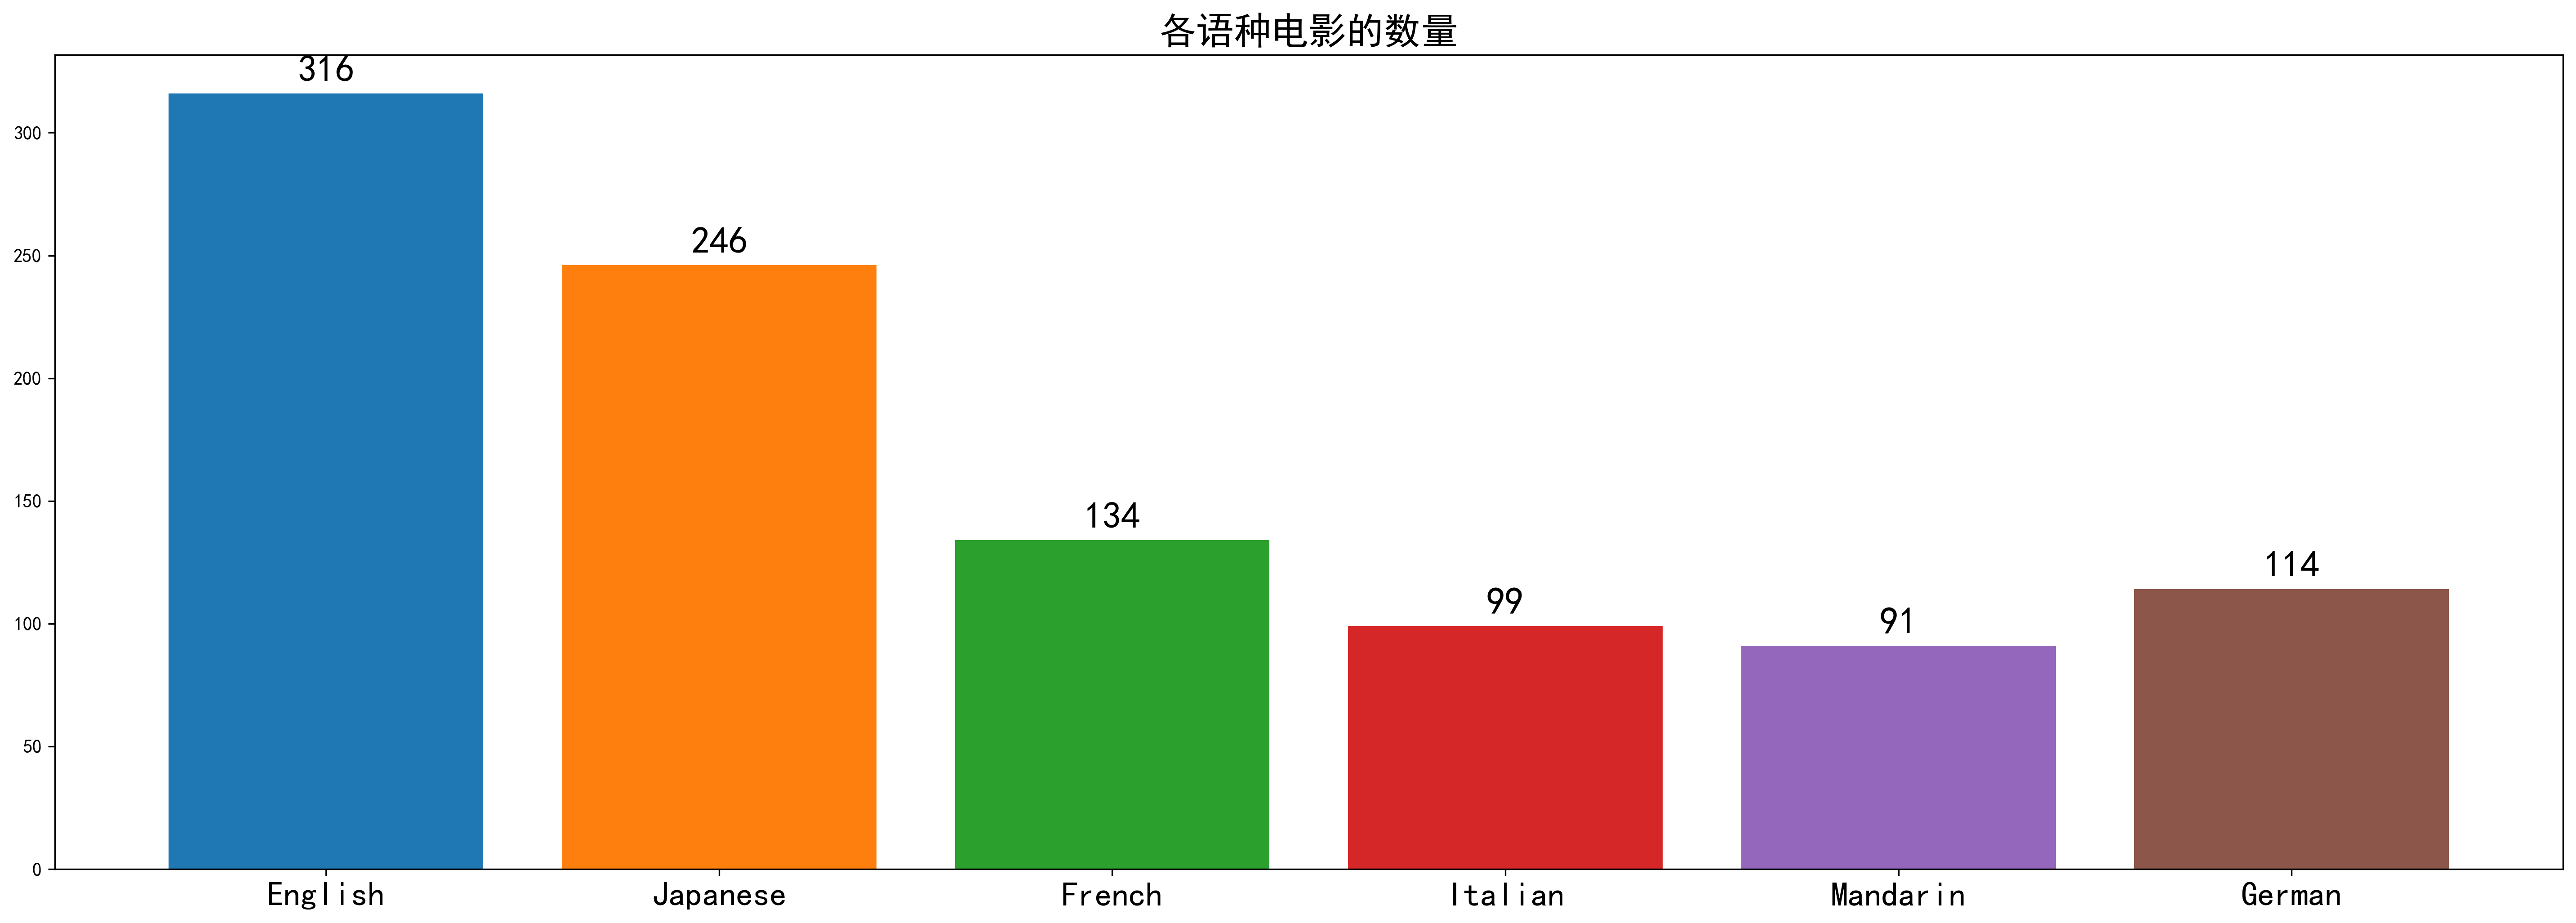

In [213]:
plt.figure(dpi=300,figsize=(24,8))
plt.xticks(fontsize=18)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.bar(lname[1:],lcount[1:],color=colors)
for x,y in list(zip(lname[1:],lcount[1:])):
    plt.text(x, y+5,y,ha='center',fontsize=20)
plt.title("各语种电影的数量",fontsize=20)
plt.savefig('out_data/各语种电影的数量.png')
plt.show()

## 2、各语种电影的占比

In [214]:
l_sum = sum(lcount)
for i in range(1,len(lcount)):
    lcount[i]/=l_sum
    lcount[i]*=100

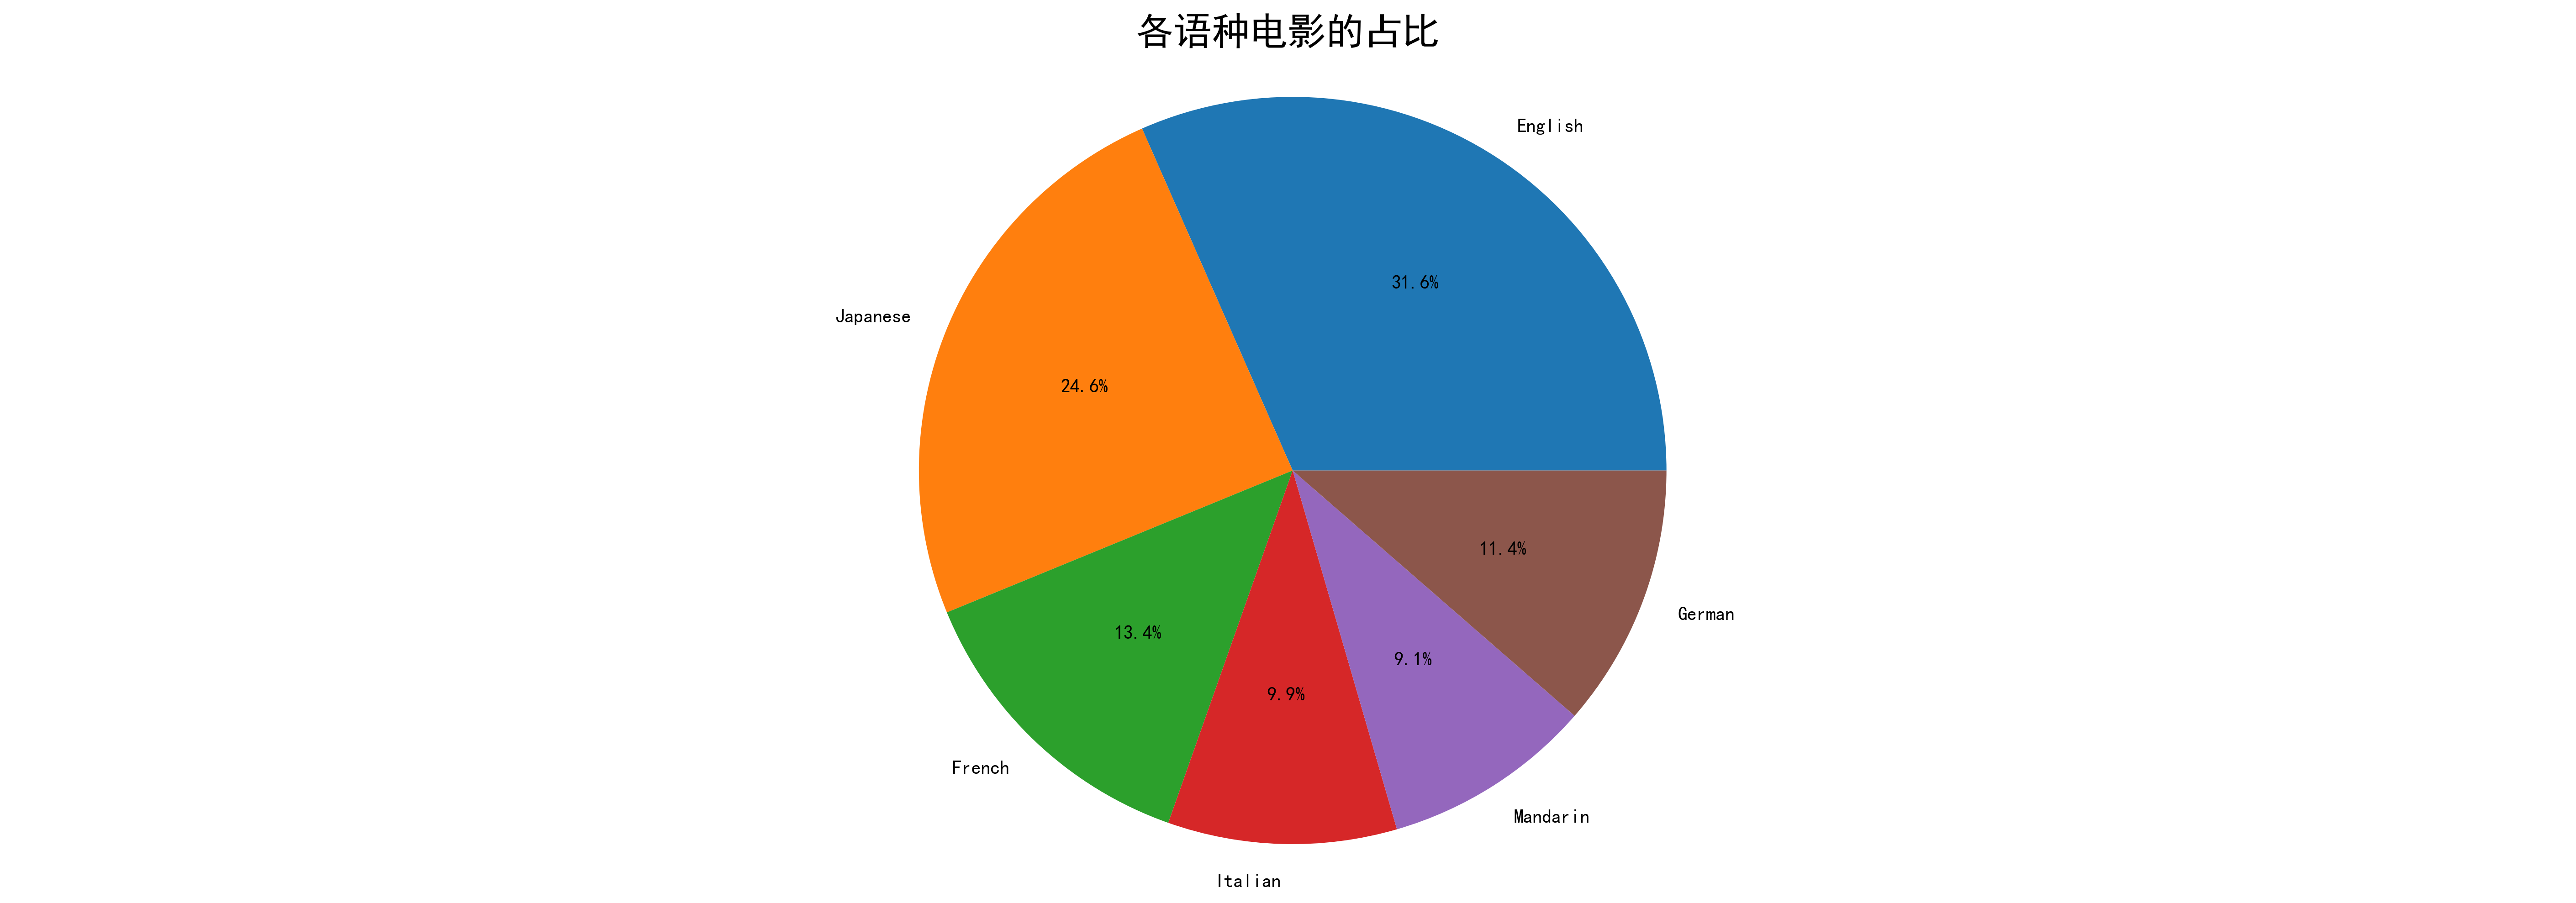

In [215]:
plt.figure(dpi=300,figsize=(24,8))
plt.xticks(fontsize=50)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.pie(lcount[1:],labels=lname[1:],colors=colors,autopct='%1.1f%%')
plt.title("各语种电影的占比",fontsize=20)
plt.axis('equal')
plt.savefig('out_data/各语种电影的占比.png')
plt.show()

## 3、各个国家的客户数（前10名）

In [216]:
conn = pymysql.connect(
    host='localhost',
    port = 3306,
    user= 'root',  # 这里是连接数据库时数据库的用户名，这里的user和上边的user没有关系
    password='123456',   # 这里是连接数据库时数据库的密码，这里的password和上边的password没有关系
    db = 'sakila_dwh',   # 这个是数据库的其中一个库名，也是我要进行连接的库
    charset = 'utf8'  # 默认编码
)
cursor = conn.cursor()
sql = 'select customer_country,count("customer_country") as count_c from dim_customer group by customer_country order by count_c desc'
lname = []
lcount = []

try:
    row = cursor.execute(sql)
    results = cursor.fetchall()
    for num in results:
        lname.append(num[0])
        lcount.append(num[1])
        print("lname=%s,lcount=%s" %(num[0], num[1]))
    cursor.close()
    conn.close()
except:
    print("Error: unable to fetch data")
if row:
    print("登录成功")
else:
    print("登陆失败")

lname=India,lcount=60
lname=China,lcount=53
lname=United States,lcount=36
lname=Japan,lcount=31
lname=Mexico,lcount=30
lname=Russian Federation,lcount=28
lname=Brazil,lcount=28
lname=Philippines,lcount=20
lname=Turkey,lcount=15
lname=Indonesia,lcount=14
lname=Nigeria,lcount=13
lname=Argentina,lcount=13
lname=South Africa,lcount=11
lname=Taiwan,lcount=10
lname=United Kingdom,lcount=9
lname=Iran,lcount=8
lname=Poland,lcount=8
lname=Italy,lcount=7
lname=Venezuela,lcount=7
lname=Germany,lcount=7
lname=Ukraine,lcount=6
lname=Colombia,lcount=6
lname=Egypt,lcount=6
lname=Vietnam,lcount=6
lname=Pakistan,lcount=5
lname=Saudi Arabia,lcount=5
lname=Spain,lcount=5
lname=South Korea,lcount=5
lname=Netherlands,lcount=5
lname=Canada,lcount=5
lname=France,lcount=4
lname=Israel,lcount=4
lname=Peru,lcount=4
lname=Yemen,lcount=4
lname=Bangladesh,lcount=3
lname=Morocco,lcount=3
lname=Thailand,lcount=3
lname=Chile,lcount=3
lname=Malaysia,lcount=3
lname=Switzerland,lcount=3
lname=Algeria,lcount=3
lname=Moza

In [217]:
lname1 = []
lcount1 = []
for i in range(len(lname)):
    if (lname[i]!=None):
        lname1.append(lname[i])
        lcount1.append(lcount[i])

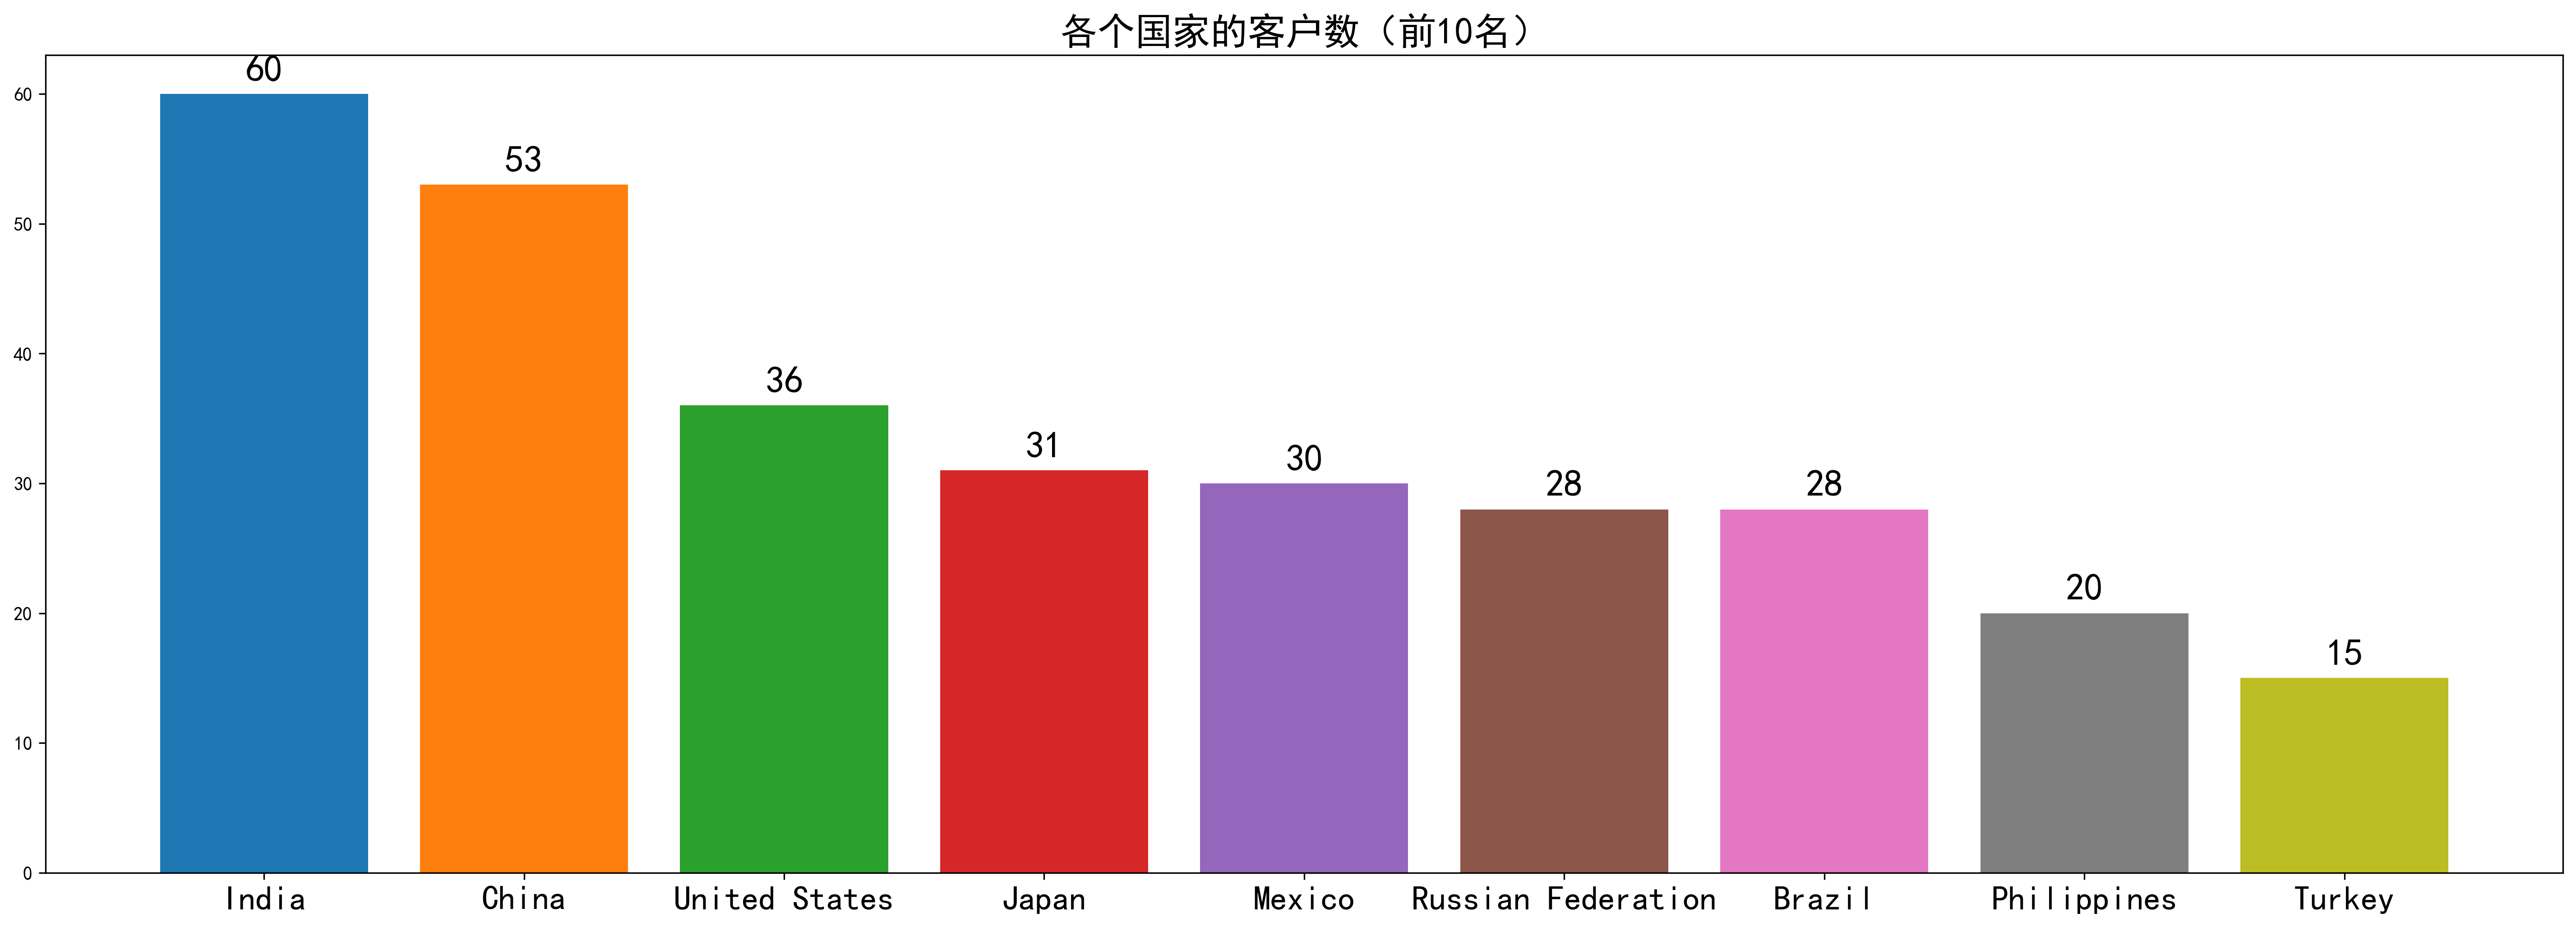

In [218]:
plt.figure(dpi=300,figsize=(24,8))
plt.xticks(fontsize=18)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.bar(lname1[0:9],lcount1[0:9],color=colors)
for x,y in list(zip(lname1[:9],lcount1[:9])):
    plt.text(x, y+1,y,ha='center',fontsize=20)
plt.title("各个国家的客户数（前10名）",fontsize=20)
plt.savefig('out_data/各个国家的客户数（前10名）.png')
plt.show()

## 4、创收排名前五的电影营收额

In [219]:
conn = pymysql.connect(
    host='localhost',
    port = 3306,
    user= 'root',  # 这里是连接数据库时数据库的用户名，这里的user和上边的user没有关系
    password='123456',   # 这里是连接数据库时数据库的密码，这里的password和上边的password没有关系
    db = 'sakila_dwh',   # 这个是数据库的其中一个库名，也是我要进行连接的库
    charset = 'utf8'  # 默认编码
)
cursor = conn.cursor()
sql = 'select film_title,sum(rental_amount) as sum_amount from dim_film,fact_rental \
where dim_film.film_key = fact_rental.film_key group by film_title order by sum_amount desc'
lname = []
lcount = []

try:
    row = cursor.execute(sql)
    results = cursor.fetchall()
    for num in results:
        lname.append(num[0])
        lcount.append(num[1])
        print("lname=%s,lcount=%s" %(num[0], num[1]))
    cursor.close()
    conn.close()
except:
    print("Error: unable to fetch data")
if row:
    print("登录成功")
else:
    print("登陆失败")

lname=TELEGRAPH VOYAGE,lcount=231.73000000000008
lname=WIFE TURN,lcount=223.69000000000005
lname=ZORRO ARK,lcount=214.69000000000008
lname=GOODFELLAS SALUTE,lcount=209.69000000000005
lname=SATURDAY LAMBS,lcount=204.72000000000008
lname=TITANS JERK,lcount=201.71000000000006
lname=TORQUE BOUND,lcount=198.72000000000003
lname=HARRY IDAHO,lcount=195.70000000000005
lname=INNOCENT USUAL,lcount=191.74000000000004
lname=HUSTLER PARTY,lcount=190.78000000000003
lname=PELICAN COMFORTS,lcount=188.74000000000004
lname=CAT CONEHEADS,lcount=181.70000000000005
lname=ENEMY ODDS,lcount=180.71000000000006
lname=BUCKET BROTHERHOOD,lcount=180.66000000000005
lname=RANGE MOONWALKER,lcount=179.73000000000005
lname=MASSACRE USUAL,lcount=179.70000000000005
lname=VIDEOTAPE ARSENIC,lcount=178.71000000000004
lname=DOGMA FAMILY,lcount=178.70000000000002
lname=APACHE DIVINE,lcount=178.69000000000003
lname=VELVET TERMINATOR,lcount=177.74000000000004
lname=DORADO NOTTING,lcount=176.73000000000002
lname=FOOL MOCKINGBIR

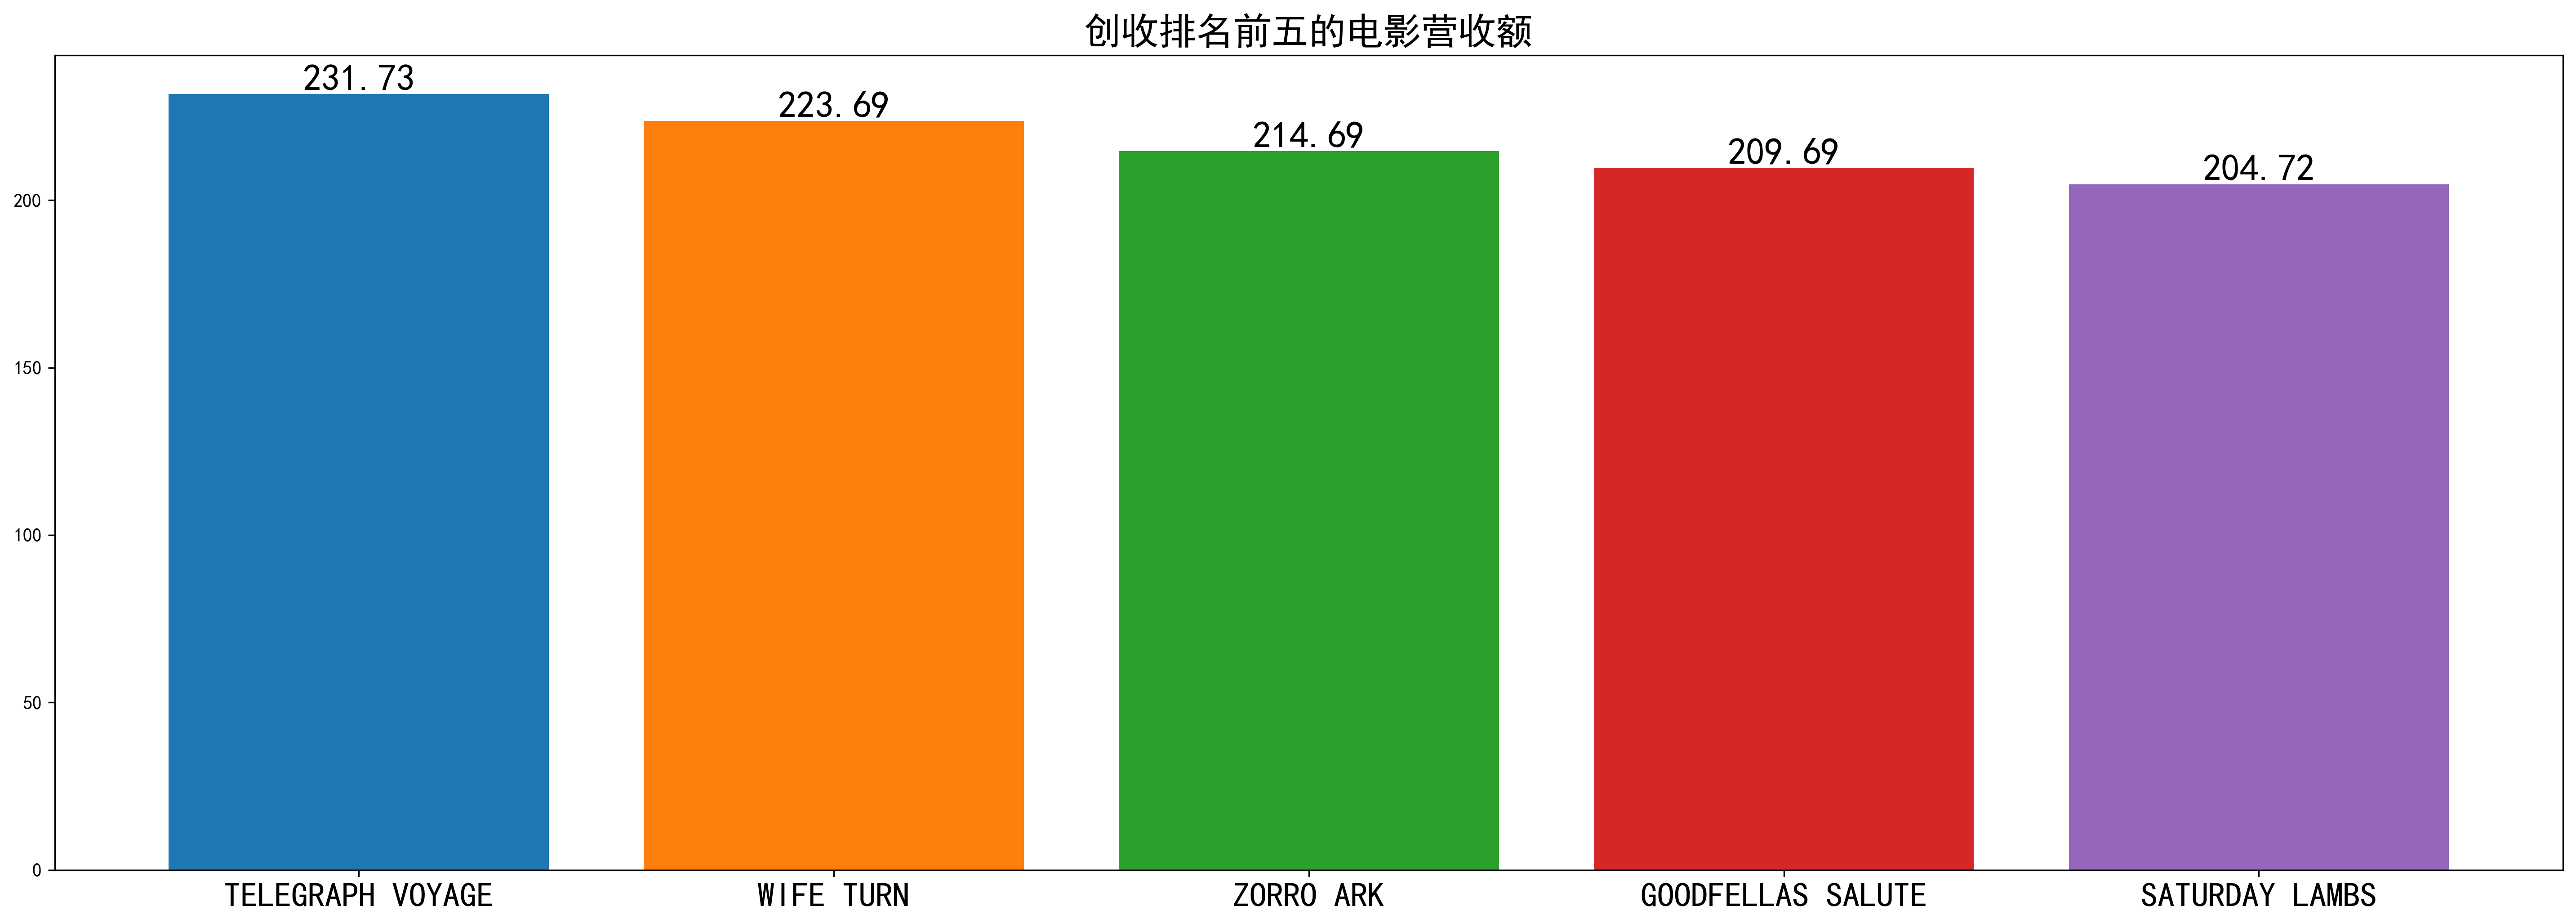

In [220]:
for i in range(len(lcount)):
    lcount[i]=round(lcount[i],2)
plt.figure(dpi=300,figsize=(24,8))
plt.xticks(fontsize=18)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.bar(lname[0:5],lcount[0:5],color=colors)
for x,y in list(zip(lname[:5],lcount[:5])):
    plt.text(x, y+1,y,ha='center',fontsize=20)
plt.title("创收排名前五的电影营收额",fontsize=20)
plt.savefig('out_data/创收排名前五的电影营收额.png')
plt.show()

## 5、各个职员的营业额

In [221]:
conn = pymysql.connect(
    host='localhost',
    port = 3306,
    user= 'root',  # 这里是连接数据库时数据库的用户名，这里的user和上边的user没有关系
    password='123456',   # 这里是连接数据库时数据库的密码，这里的password和上边的password没有关系
    db = 'sakila_dwh',   # 这个是数据库的其中一个库名，也是我要进行连接的库
    charset = 'utf8'  # 默认编码
)
cursor = conn.cursor()
sql = 'select staff_first_name,sum(rental_amount) as sum_amount from dim_staff,fact_rental \
where dim_staff.staff_key = fact_rental.staff_key group by staff_first_name order by sum_amount desc'
lname = []
lcount = []

try:
    row = cursor.execute(sql)
    results = cursor.fetchall()
    for num in results:
        lname.append(num[0])
        lcount.append(num[1])
        print("lname=%s,lcount=%s" %(num[0], num[1]))
    cursor.close()
    conn.close()
except:
    print("Error: unable to fetch data")
if row:
    print("登录成功")
else:
    print("登陆失败")

lname=Jon,lcount=33881.940000004965
lname=Mike,lcount=33524.620000005154
登录成功


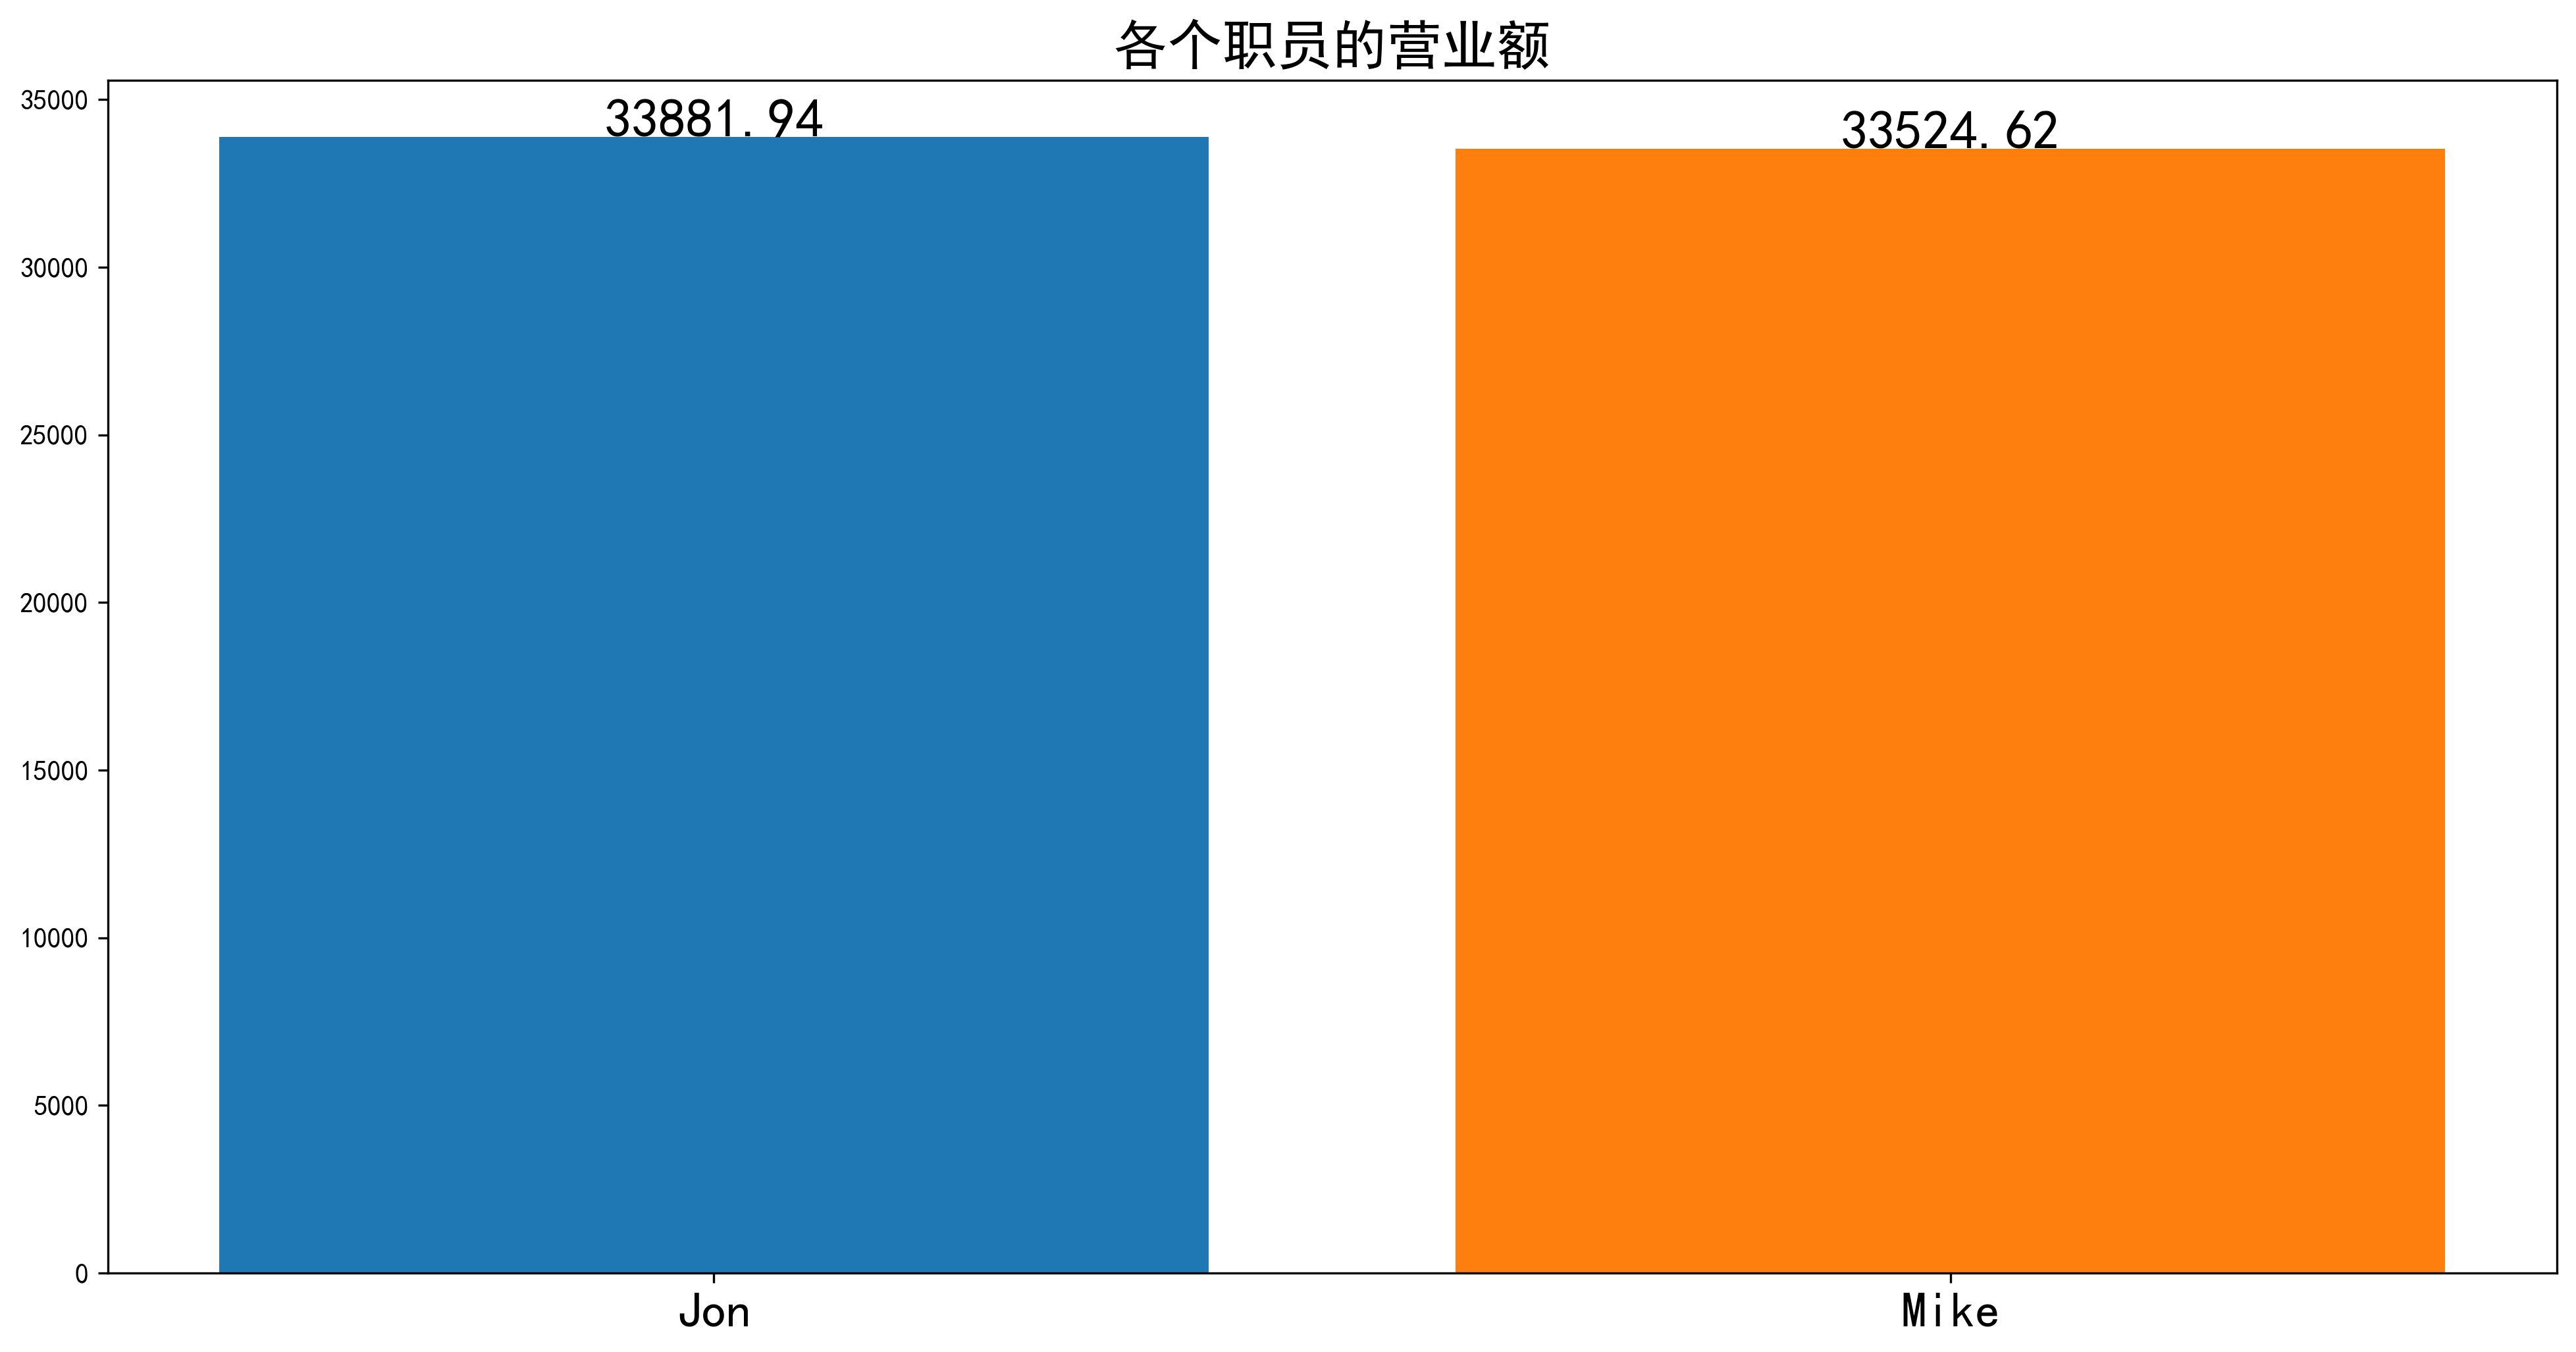

In [222]:
for i in range(len(lcount)):
    lcount[i]=round(lcount[i],2)
plt.figure(dpi=300,figsize=(16,8))
plt.xticks(fontsize=18)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.bar(lname,lcount,color=colors)
for x,y in list(zip(lname,lcount)):
    plt.text(x, y+1,y,ha='center',fontsize=20)
plt.title("各个职员的营业额",fontsize=20)
plt.savefig('out_data/各个职员的营业额.png')
plt.show()

In [14]:
conn = pymysql.connect(
    host='localhost',
    port = 3306,
    user= 'root',  # 这里是连接数据库时数据库的用户名，这里的user和上边的user没有关系
    password='123456',   # 这里是连接数据库时数据库的密码，这里的password和上边的password没有关系
    db = 'sakila_dwh',   # 这个是数据库的其中一个库名，也是我要进行连接的库
    charset = 'utf8'  # 默认编码
)
cursor = conn.cursor()
sql = 'select store_name,sum(rental_amount) as sum_amount from dim_store,fact_rental \
where dim_store.store_key = fact_rental.store_key group by store_name order by sum_amount desc'
lname = []
lcount = []

try:
    row = cursor.execute(sql)
    results = cursor.fetchall()
    for num in results:
        lname.append(num[0])
        lcount.append(num[1])
        print("lname=%s,lcount=%s" %(num[0], num[1]))
    cursor.close()
    conn.close()
except:
    print("Error: unable to fetch data")
if row:
    print("登录成功")
else:
    print("登陆失败")

lname=Store-B,lcount=33726.770000005155
lname=Store-A,lcount=33679.79000000504
登录成功


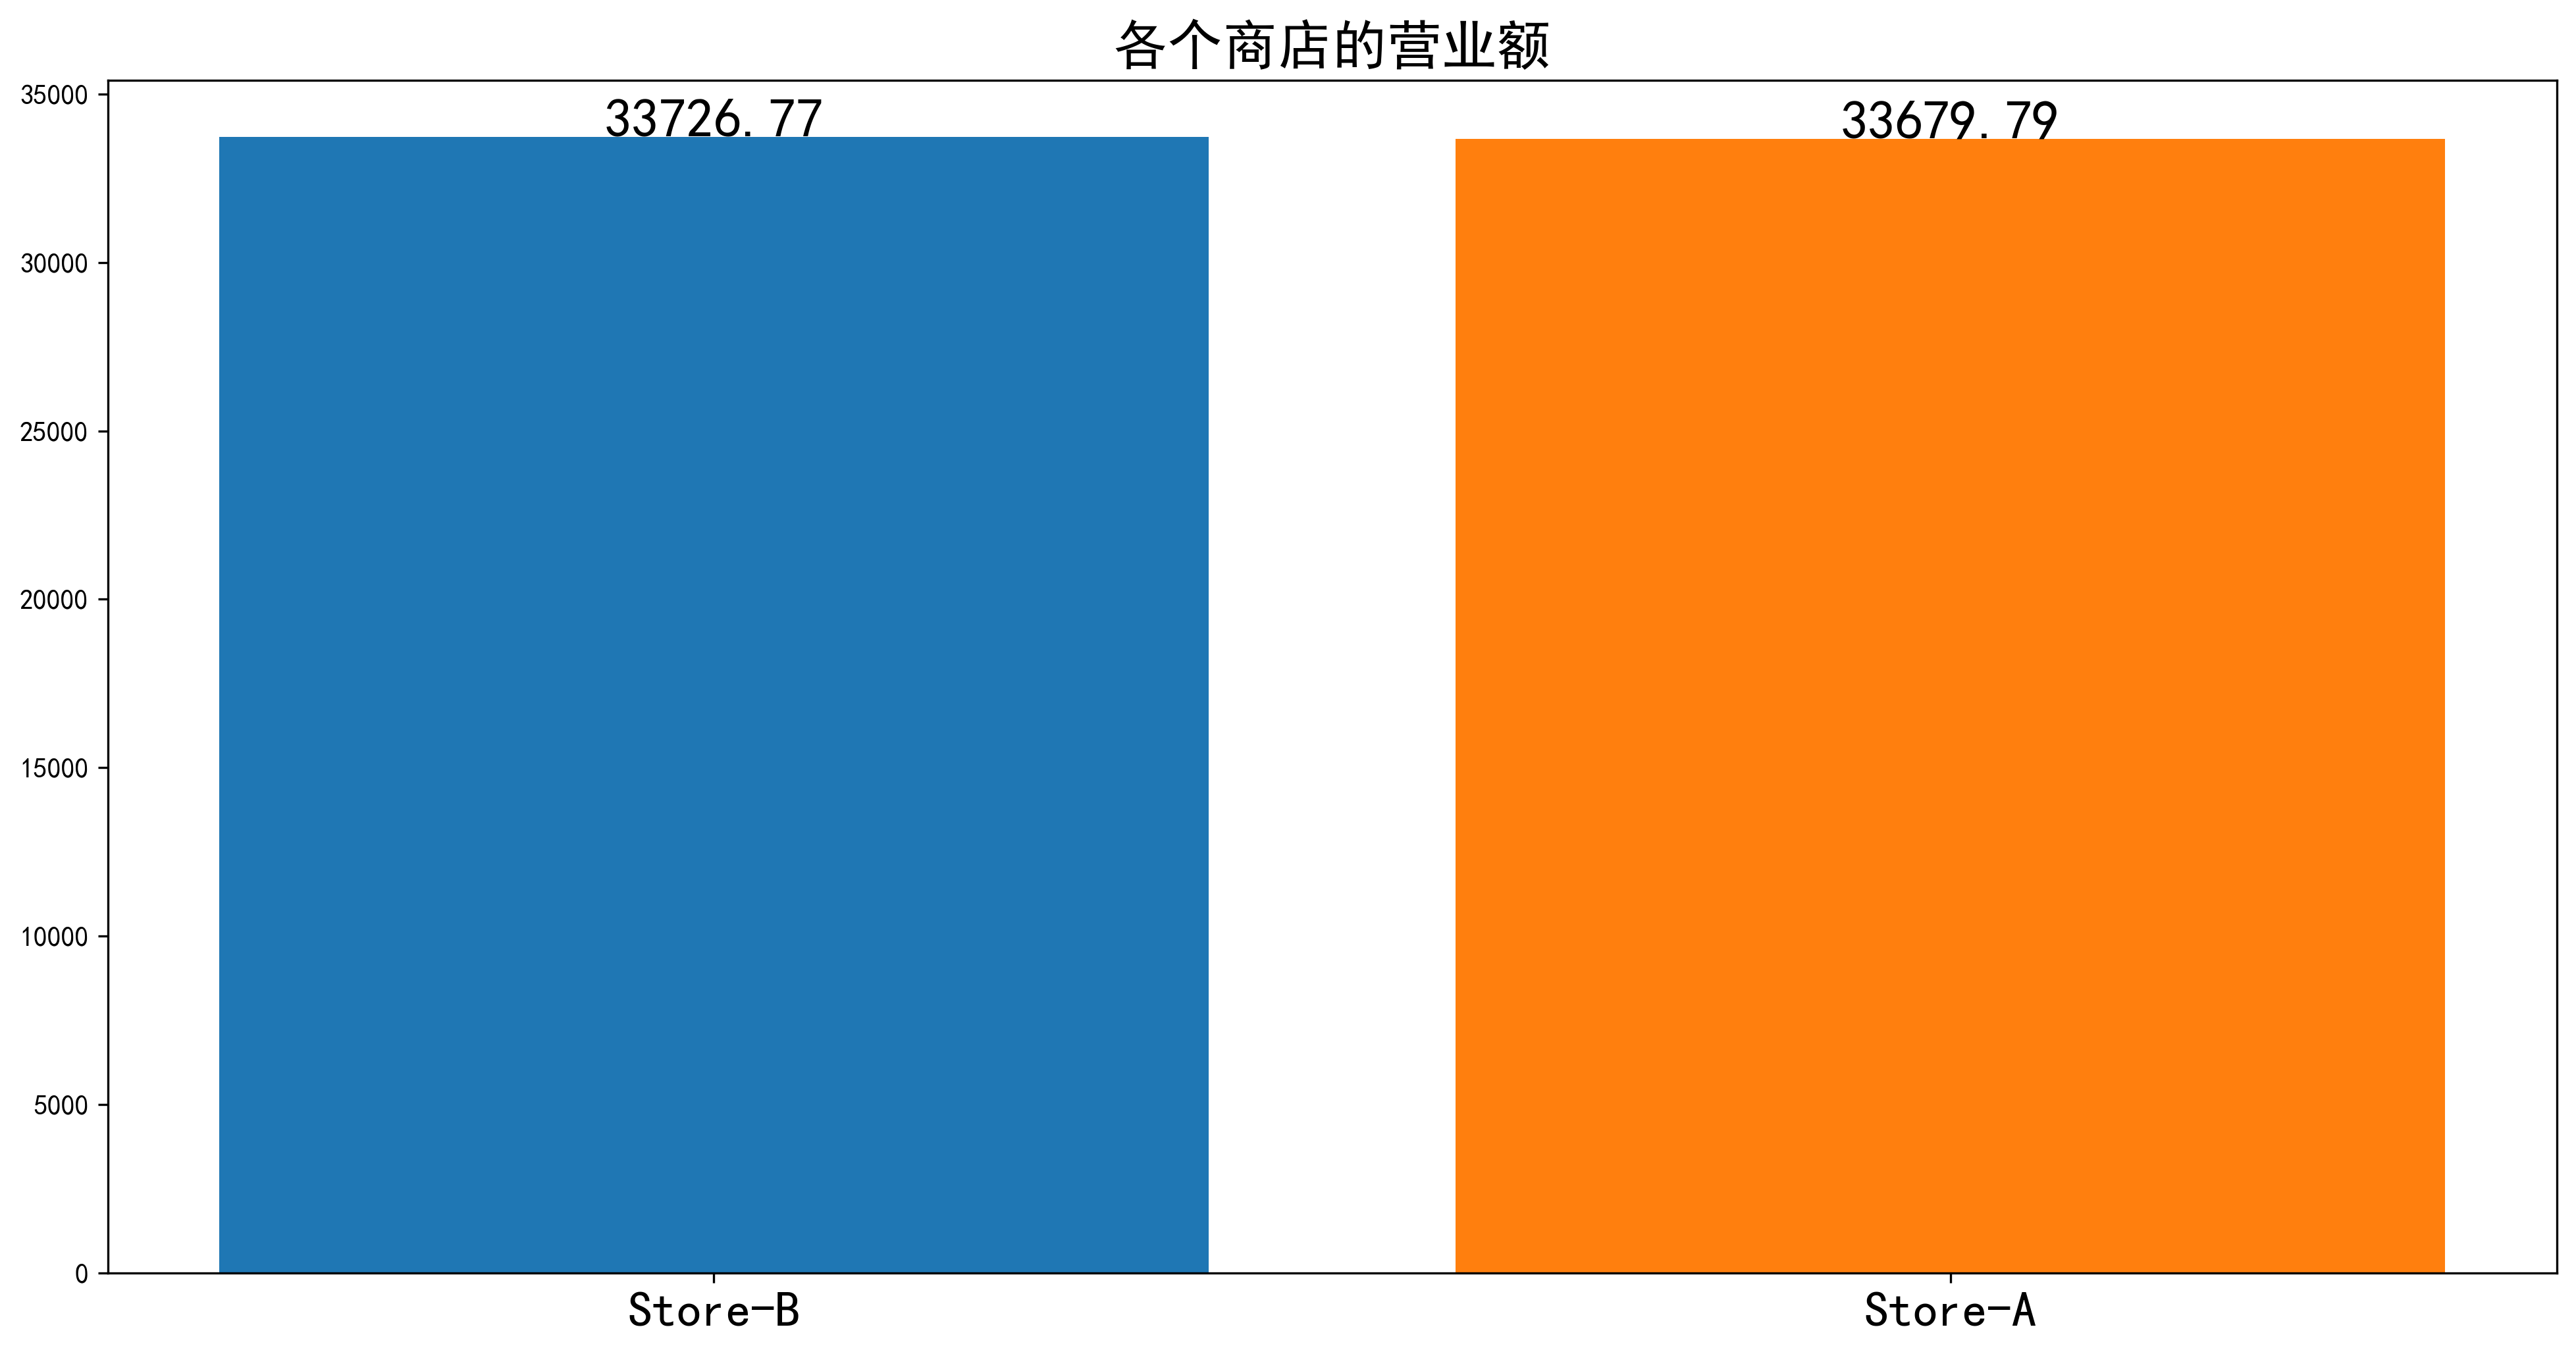

In [16]:
for i in range(len(lcount)):
    lcount[i]=round(lcount[i],2)
plt.figure(dpi=300,figsize=(16,8))
plt.xticks(fontsize=18)
colors=list(mcolors.TABLEAU_COLORS.keys())
plt.bar(lname,lcount,color=colors)
for x,y in list(zip(lname,lcount)):
    plt.text(x, y+1,y,ha='center',fontsize=20)
plt.title("各个商店的营业额",fontsize=20)
plt.savefig('out_data/各个商店的营业额.png')
plt.show()